# VGChartz Video Game Sales EDA
Analysis Written By: Heidi

Here we will explore the  [**VGChartz Video Game Sales**](https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset?resource=download&select=Video_Games_Sales_as_at_22_Dec_2016.csv) dataset through exploratory data analysis (EDA), an interactive dashboard (Tableau) and predictive analysis (Classification).

**Time Frame Conducted:** 1980 - 2020   
**Source:** Kaggle  

**Synopsis of Study:** VGChartz is a network consisting of 5 video game websites: VGChartz, gamrFeed, gamrReview, gamrTV and gamrConnect. The platform provides weekly game sales tracking by region along with tools for data analysis and reviews for the video gaming industry. The dataset used for this project consist of sales and review data for different platform and games between the years listed above.

This dataset consists of 16,719 observations and 16 variables:
- Completed Cases: 6,825

Variable|Description
-|:---
Name|Name of the game
Platform|Platform of the game
Year of Release|Year the game was released
Genre|Genre of the Game
Publisher|Publisher of the Game
NA|Sales in North America (in Millions)
EU|Sales in Europe (in Millions)
JP|Sales in Japan (in Millions)
Other|Sales in rest of the world (in Millions)
Global|Total worldwide sales (in Millions)
Critic Score|Aggregate score compiled by Metacritic staff
Critic Count|Number of Critics that gave a score
User Score|Score by Metacritic's subscribers
User Count|Number of Users (Metacritic's subscribers) that gave a score
Developer|Developer of the game
Rating|Entertainment Software Rating Board (ESRB) Rating of the Game
Type|Handheld or Console based on type of Platform

<br>

## Platform

There are a lot of platforms in this dataset which are all written in acronyms. This table shows their full names, this helped me a lot and I hope it helped you too!

Platform|Description
-|:---
2600|Atari 2600
3DO|3DO Interactive Multiplayer
3DS|Nintendo 3DS
DC|Sega Dreamcast
DS|Nintendo DS
GB|Game Boy
GBA|Game boy Advance
GC|Nintendo Gamecube
GEN|Sega Genesis
GG|Game Gear
N64|Nintendo 64
NES|Nintendo Entertainment System
NG|Neo Geo
PC|Personal Computer
PCFX|PC-FX
PS|PlayStation
PS2|PlayStation 2
PS3|PlayStation 3
PS4|PlayStation 4
PSP|PlayStation Portable
PSV|PlayStation Vita
SAT|Sega Saturn
SCD|Sega CD
SNES|Super Nintendo Entertainment System
TG16|TurboGrafx-16
WS|WonderSwan
Wii|Nintendo Wii
WiiU|Wii U
X360|Xbox 360
XB|Xbox
XONE|Xbox One
<br>

## Rating

The Entertainment Software Rating Board (<b>ESRB</b>) was established in 1994 and is a system used in the United States and Canada to provide age and content ratings for video games. It is intended to assist consumers, particulary parents, in understanding the appropriateness of these games for different age groups. Below is a description of all the ratings in the dataset:
- <b>K-A:</b> was used until 1998 where it was then changed to <b>E</b>
  - <b>K-A:</b> will be modified to <b> E </b> for this analysis.

ESRB Rating|Description
-|:---
E|Everyone
M|Mature
T|Teen
E10+|Everyone Ages 10+
K-A|Kids to Adult
AO|Adults Only 18+
EC|Early Childhood (Ages 3+)
RP|Rating Pending

![](https://raw.githubusercontent.com/heiditm/heiditm.github.io/master/images/ESRB%20Rating%20Symbols.png)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install plotly --upgrade
# pip install dash
import plotly.express as px
import plotly.graph_objects as go
# from dash import Dash, dcc, html, Input, Output
from plotly.subplots import make_subplots
from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv('file.csv')

df.rename(columns={
    'NA_Sales': 'NA',
    'EU_Sales': 'EU',
    'JP_Sales': 'JP',
    'Other_Sales': 'Other',
    'Global_Sales': 'Global'
}, inplace=True)
df.columns = df.columns.str.replace('_', ' ')
df['Year of Release'] = df['Year of Release'].astype("Int64")
df['Rating'] = df['Rating'].replace('K-A', 'E')
df['Type'] = np.where(df['Platform'].isin(['GB','DS','GBA','3DS','PSP','PSV','WS','GG','WiiU']),'Handheld','Console')
df.to_csv('VGChartz.csv', index=False)
df.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(16719, 17)

In [33]:
# ======================
# EDA with Visualization
# ======================
df['Platform'].value_counts().head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
Name: Platform, dtype: int64

In [34]:
type_df = pd.DataFrame(df.groupby(['Publisher', 'Type']).size().unstack(fill_value=0).reset_index())
type_df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Type,Publisher,Console,Handheld
0,10TACLE Studios,1,2
1,1C Company,3,0
2,20th Century Fox Video Games,5,0
3,2D Boy,1,0
4,3DO,36,0


In [35]:
def univariate_horizontal_bar(variable):
  column_counts = df[variable].value_counts().reset_index()
  column_counts.columns = [variable, 'Count']
  total_count = column_counts['Count'].sum()

  column_counts['Percentage'] = (column_counts['Count'] / total_count) * 100
  column_counts['Percentage'] = column_counts['Percentage'].apply(lambda x: f'{x:.2f}%')
  column_counts = column_counts.sort_values(by='Count', ascending=False)
  column_counts = column_counts.head(10)

  title = f'Top 10 {variable}\'s Number of Games'
  fig = px.bar(column_counts, x='Count', y=variable, orientation='h', text='Count', hover_data=['Percentage'], color=variable, title=title)
  fig.update_traces(texttemplate='%{text}', textposition='outside')
  fig.update_layout(xaxis_title='Number of Games')
  fig.show()

COI = ['Platform','Genre','Publisher','Developer','Rating']
for i in COI:
    univariate_horizontal_bar(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


## Platform Insights

Category|Total Percentage in Top 10|Platforms Included
-|:-:|:-
Console|48.43%|PS2, PS3, Wii, X360, PS, XB, PC
Handheld| 25.02%|DS, PSP, GBA

## Publisher Insights

Country of Orgin/Region|Total Percentage in Top 10|Publishers Included
-|:-:|:-
American|20.83%|Electronic Arts (EA), Activision, THQ, Take-Two Interactive
Japan|22.82%|Namco Bandi Games, Konami Digital Entertainment, Nintendo, Sony Computer Entertainment, Sega
French|5.60%|Ubisoft

## Developer Insights
Skewed results as there are many companies under <b>Electronic Arts</b> which is included in the Top 10

Country of Orgin/Region|Total Percentage in Top 10|Developers Included
-|:-:|:-
American|21.73%|Electronic Arts (Inclusive of all EA), Visual Concept
Japan|3.77%|Konami Digital Entertainment, Capcom, Omega Force
French|3.02%|Ubisoft (Inclusive of all Ubisoft)

In [36]:
def top_5(variable):
  grouped_df = df.groupby(['Year of Release', variable])['Global'].sum().reset_index()
  top_df = grouped_df.groupby('Year of Release', group_keys=False).apply(lambda x: x.nlargest(5, 'Global'))
  top_df['Rank'] = top_df.groupby('Year of Release')['Global'].rank(ascending=False).astype(int)

  top_df = top_df[variable].value_counts().reset_index().head()
  top_df.columns = [variable, 'Times in the Top 5']

  display(top_df)
for i in COI:
    top_5(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Platform,Times in the Top 5
0,PC,13
1,GB,12
2,NES,11
3,2600,10
4,PS3,9


,Genre,Times in the Top 5
0,Sports,33
1,Action,32
2,Role-Playing,27
3,Platform,23
4,Shooter,19


,Publisher,Times in the Top 5
0,Nintendo,34
1,Activision,23
2,Electronic Arts,21
3,Sony Computer Entertainment,16
4,Ubisoft,10


,Developer,Times in the Top 5
0,Nintendo,11
1,EA Sports,9
2,Capcom,6
3,EA Canada,6
4,Rockstar North,5


,Rating,Times in the Top 5
0,T,24
1,M,22
2,E,22
3,E10+,15
4,EC,3


In [37]:
def bivariate_horizontal_bar(variable):
    grouped_data = df.groupby(variable)['Global'].sum().reset_index()
    grouped_data = grouped_data.sort_values(by='Global', ascending=False).head(10)

    title = f'Top 10 {variable}\'s Global Sales'
    fig = px.bar(grouped_data, x='Global', y=variable, orientation='h', text='Global',
                 hover_data={'Global': ':,.2f'}, color=variable, title=title)
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(xaxis_title='Global Sales')
    fig.show()

for i in COI:
    bivariate_horizontal_bar(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
def line_chart_global_sales_by_year():
    grouped_data = df.groupby('Year of Release')['Global'].sum().reset_index()

    title = 'Global Sales Per Year of Release'
    fig = px.line(grouped_data, x='Year of Release', y='Global', title=title, markers=True)
    fig.update_layout(yaxis_title='Global Sales')
    fig.show()

line_chart_global_sales_by_year()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
test = df.dropna()
fig = px.scatter(test, x='Global', y='Critic Score', color='Platform',
                 size='User Score', hover_data=['Name'])
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
# =====================
# EDA with SQL
# =====================
!pip install sqlalchemy==1.3.9
!pip install ipython-sql
%load_ext sql
import sqlite3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  Using cached SQLAlchemy-1.3.9-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.24
    Uninstalling SQLAlchemy-2.0.24:
      Successfully uninstalled SQLAlchemy-2.0.24
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.17.0 requires sqlalchemy<3.0dev,>=1.4, but you have sqlalchemy 1.3.9 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.3.9 which is incompatible.


  Using cached SQLAlchemy-2.0.24-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [41]:
con = sqlite3.connect("df.db")
cur = con.cursor()
%sql sqlite:///df.db

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
df.to_sql("DF", con, if_exists='replace', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16719

In [43]:
%%sql SELECT * FROM DF LIMIT 5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


Name,Platform,Year of Release,Genre,Publisher,NA,EU,JP,Other,Global,Critic Score,Critic Count,User Score,User Count,Developer,Rating,Type
Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Console
Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,None,None,None,None,None,None,Console
Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,Console
Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,Console
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37,None,None,None,None,None,None,Handheld


In [44]:
%%sql SELECT PLATFORM, NAME, MAX(GLOBAL) AS [GLOBAL SALES] FROM DF
 GROUP BY PLATFORM
 ORDER BY MAX(GLOBAL) DESC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


Platform,Name,GLOBAL SALES
Wii,Wii Sports,82.53
NES,Super Mario Bros.,40.24
GB,Pokemon Red/Pokemon Blue,31.37
DS,New Super Mario Bros.,29.8
X360,Kinect Adventures!,21.81
PS3,Grand Theft Auto V,21.04
PS2,Grand Theft Auto: San Andreas,20.81
SNES,Super Mario World,20.61
GBA,Pokemon Ruby/Pokemon Sapphire,15.85
PS4,Call of Duty: Black Ops 3,14.63


In [45]:
%%sql SELECT DEVELOPER, NAME FROM DF
 GROUP BY DEVELOPER
 ORDER BY MAX(GLOBAL) DESC
 LIMIT 20

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


Developer,Name
Nintendo,Wii Sports
None,Super Mario Bros.
Good Science Studio,Kinect Adventures!
Rockstar North,Grand Theft Auto V
Polyphony Digital,Gran Turismo 3: A-Spec
"Infinity Ward, Sledgehammer Games",Call of Duty: Modern Warfare 3
Treyarch,Call of Duty: Black Ops
Infinity Ward,Call of Duty: Modern Warfare 2
DMA Design,Grand Theft Auto III
Game Arts,Super Smash Bros. Brawl


In [46]:
%%sql SELECT PUBLISHER, NAME FROM DF
 GROUP BY PUBLISHER
 ORDER BY MAX(GLOBAL) DESC
 LIMIT 20

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


Publisher,Name
Nintendo,Wii Sports
Microsoft Game Studios,Kinect Adventures!
Take-Two Interactive,Grand Theft Auto V
Sony Computer Entertainment,Gran Turismo 3: A-Spec
Activision,Call of Duty: Modern Warfare 3
Ubisoft,Just Dance 3
Bethesda Softworks,The Elder Scrolls V: Skyrim
Electronic Arts,FIFA 16
Sega,Mario & Sonic at the Olympic Games
SquareSoft,Final Fantasy VIII


In [47]:
%%sql SELECT TYPE, COUNT(TYPE) FROM
(SELECT [YEAR OF RELEASE], PUBLISHER, DEVELOPER, PLATFORM, TYPE, GENRE, NAME, MAX(GLOBAL) AS [GLOBAL SALES] FROM DF
 GROUP BY [YEAR OF RELEASE]
 ORDER BY [YEAR OF RELEASE])
 GROUP BY TYPE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


TYPE,COUNT(TYPE)
Console,32
Handheld,8


In [48]:
%%sql SELECT [YEAR OF RELEASE], PUBLISHER, DEVELOPER, PLATFORM, TYPE, GENRE, NAME, MAX(GLOBAL) AS [GLOBAL SALES] FROM DF
 GROUP BY [YEAR OF RELEASE]
 ORDER BY [YEAR OF RELEASE]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


Year of Release,Publisher,Developer,Platform,Type,Genre,Name,GLOBAL SALES
None,Electronic Arts,EA Tiburon,PS2,Console,Sports,Madden NFL 2004,5.23
1980,Atari,None,2600,Console,Shooter,Asteroids,4.31
1981,Activision,None,2600,Console,Platform,Pitfall!,4.5
1982,Atari,None,2600,Console,Puzzle,Pac-Man,7.81
1983,Nintendo,None,NES,Console,Sports,Baseball,3.2
1984,Nintendo,None,NES,Console,Shooter,Duck Hunt,28.31
1985,Nintendo,None,NES,Console,Platform,Super Mario Bros.,40.24
1986,Nintendo,None,NES,Console,Action,The Legend of Zelda,6.51
1987,Nintendo,None,NES,Console,Adventure,Zelda II: The Adventure of Link,4.38
1988,Nintendo,None,NES,Console,Platform,Super Mario Bros. 3,17.28


In [49]:
%%sql SELECT PUBLISHER, COUNT(PUBLISHER) AS [NUMBER OF GAME OF THE YEAR] FROM
 (SELECT [YEAR OF RELEASE], PUBLISHER, PLATFORM, GENRE, TYPE, NAME, MAX(GLOBAL) AS [GLOBAL SALES] FROM DF
 GROUP BY [YEAR OF RELEASE]
 ORDER BY [YEAR OF RELEASE])
 GROUP BY PUBLISHER
 ORDER BY COUNT(PUBLISHER) DESC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


PUBLISHER,NUMBER OF GAME OF THE YEAR
Nintendo,22
Take-Two Interactive,4
Activision,4
Electronic Arts,3
Sony Computer Entertainment,2
Atari,2
Ubisoft,1
Sega,1
Microsoft Game Studios,1


In [50]:
%%sql SELECT [YEAR OF RELEASE], PUBLISHER, DEVELOPER, PLATFORM, TYPE, NAME FROM DF
 GROUP BY [YEAR OF RELEASE]
 ORDER BY MAX(GLOBAL) DESC
 LIMIT 5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


Year of Release,Publisher,Developer,Platform,Type,Name
2006,Nintendo,Nintendo,Wii,Console,Wii Sports
1985,Nintendo,None,NES,Console,Super Mario Bros.
2008,Nintendo,Nintendo,Wii,Console,Mario Kart Wii
2009,Nintendo,Nintendo,Wii,Console,Wii Sports Resort
1996,Nintendo,None,GB,Handheld,Pokemon Red/Pokemon Blue


In [51]:
%%sql SELECT PUBLISHER, DEVELOPER, PLATFORM, NAME, MAX([USER SCORE]) AS [USER POP] FROM DF

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


Publisher,Developer,Platform,Name,USER POP
Capcom,Capcom,PSP,Breath of Fire III,9.7


In [52]:
%%sql SELECT PUBLISHER, DEVELOPER, PLATFORM, NAME, MAX([CRITIC SCORE]) AS [CRITIC POP] FROM DF

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 * sqlite:///df.db
Done.


Publisher,Developer,Platform,Name,CRITIC POP
Take-Two Interactive,Rockstar North,X360,Grand Theft Auto IV,98.0


In [53]:
df.dropna(inplace=True)
features = ['Platform','Genre','Publisher','Critic Score','User Score','Developer','Rating']

dff = pd.get_dummies(df[features],drop_first=True)
display(dff.head(1),df.head(1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Critic Score,User Score,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,Publisher_505 Games,Publisher_5pb,Publisher_AQ Interactive,Publisher_ASCII Entertainment,Publisher_Acclaim Entertainment,Publisher_Ackkstudios,Publisher_Acquire,Publisher_Activision,Publisher_Activision Blizzard,Publisher_Activision Value,Publisher_Agatsuma Entertainment,Publisher_Agetec,Publisher_Aksys Games,Publisher_Alternative Software,Publisher_Aqua Plus,Publisher_Arc System Works,Publisher_Ascaron Entertainment GmbH,Publisher_Aspyr,Publisher_Atari,Publisher_Atlus,Publisher_Avalon Interactive,Publisher_Avanquest,Publisher_BAM! Entertainment,Publisher_Banpresto,Publisher_Bethesda Softworks,Publisher_Bigben Interactive,Publisher_Black Bean Games,Publisher_Black Label Games,Publisher_Blue Byte,Publisher_Bohemia Interactive,Publisher_Brash Entertainment,Publisher_CCP,Publisher_CDV Software Entertainment,Publisher_Capcom,Publisher_Cave,Publisher_City Interactive,Publisher_Cloud Imperium Games Corporation,Publisher_Codemasters,Publisher_Codemasters Online,Publisher_Compile Heart,Publisher_Conspiracy Entertainment,Publisher_Crave Entertainment,Publisher_Crimson Cow,Publisher_D3Publisher,Publisher_DHM Interactive,Publisher_DSI Games,Publisher_DTP Entertainment,Publisher_Deep Silver,"Publisher_Destination Software, Inc",Publisher_Destineer,Publisher_Devolver Digital,Publisher_Disney Interactive Studios,Publisher_DreamCatcher Interactive,Publisher_Dusenberry Martin Racing,Publisher_EA Games,Publisher_ESP,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Empire Interactive,Publisher_Encore,Publisher_Enix Corporation,Publisher_Enterbrain,Publisher_Evolved Games,Publisher_Falcom Corporation,Publisher_Flashpoint Games,Publisher_Focus Home Interactive,Publisher_Fox Interactive,Publisher_From Software,Publisher_FuRyu,Publisher_FuRyu Corporation,Publisher_Funbox Media,Publisher_Funcom,Publisher_Funsta,Publisher_GOA,Publisher_GT Interactive,Publisher_Game Factory,Publisher_Gamebridge,Publisher_Gamecock,Publisher_Gathering of Developers,Publisher_Gearbox Software,Publisher_Genki,Publisher_Ghostlight,Publisher_Global A Entertainment,Publisher_Global Star,Publisher_Gotham Games,Publisher_Graffiti,Publisher_Graphsim Entertainment,Publisher_Groove Games,Publisher_GungHo,Publisher_Gust,Publisher_HMH Interactive,Publisher_Harmonix Music Systems,Publisher_Hasbro Interactive,Publisher_Havas Interactive,Publisher_Hello Games,Publisher_Hip Interactive,Publisher_Home Entertainment Suppliers,Publisher_Hudson Entertainment,Publisher_Hudson Soft,Publisher_Human Entertainment,Publisher_Iceberg Interactive,Publisher_Idea Factory,Publisher_Idea Factory International,Publisher_Ignition Entertainment,Publisher_Illusion Softworks,Publisher_Indie Games,Publisher_Infogrames,Publisher_Insomniac Games,Publisher_Interplay,Publisher_Introversion Software,Publisher_Irem Software Engineering,Publisher_Jaleco,Publisher_Jester Interactive,Publisher_JoWood Productions,Publisher_Just Flight,Publisher_Kadokawa Shoten,Publisher_Kalypso Media,Publisher_Kemco,Publisher_Koch Media,Publisher_Konami Digital Entertainment,Publisher_Kool Kizz,Publisher_Level 5,Publisher_Lexicon Entertainment,Publisher_Lighthouse Interactive,Publisher_Little Orbit,Publisher_LucasArts,Publisher_MC2 Entertainment,Publisher_MTV Games,Publisher_Mad Catz,Publisher_Majesco Entertainment,Publisher_Marvelous Entertainment,Publisher_Marvelous Interactive,Publisher_Mastertronic,Publisher_Mastiff,Publisher_Max Five,Publisher_Maxis,Publisher_Media Rings,Publisher_Mercury Games,Publisher_Metro 3D,Publisher_Microids,Publisher_Microsoft Game Studios,Publisher_Midas

,Name,Platform,Year of Release,Genre,Publisher,NA,EU,JP,Other,Global,Critic Score,Critic Count,User Score,User Count,Developer,Rating,Type
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Console


In [54]:
X = dff
y = pd.get_dummies(df['Type'], drop_first=True)
ML = []

transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
# Confusion Matrix
def CM(method, cm):
  sns.heatmap(cm,
              annot=True,
              fmt='g')
  plt.ylabel('Prediction',fontsize=10)
  plt.xlabel('Actual',fontsize=10)
  plt.title(method,fontsize=15)
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

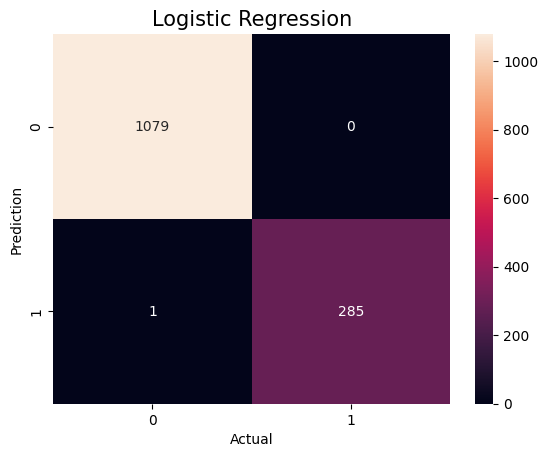

In [56]:
# =====================
# Logistic Regression
# =====================
method = 'Logistic Regression'
ML.append(method)

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)

y_pred = log_regression.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
CM(method, cm)
LR_accuracy = accuracy_score(y_test, y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

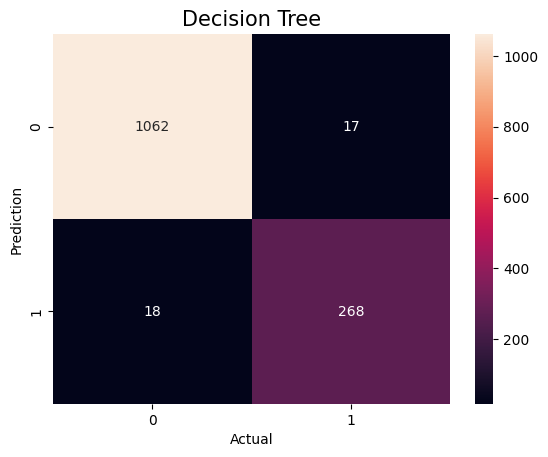

In [57]:
# =====================
# Decision Tree
# =====================
method = 'Decision Tree'
ML.append(method)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
CM(method, cm)
DT_accuracy = accuracy_score(y_test, y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

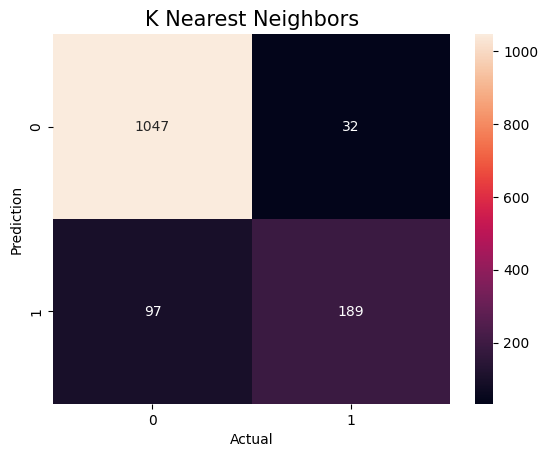

In [58]:
# =====================
# KNN
# =====================
method = 'K Nearest Neighbors'
ML.append(method)

clf = KNeighborsClassifier(p=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
CM(method, cm)
KNN_accuracy = accuracy_score(y_test, y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

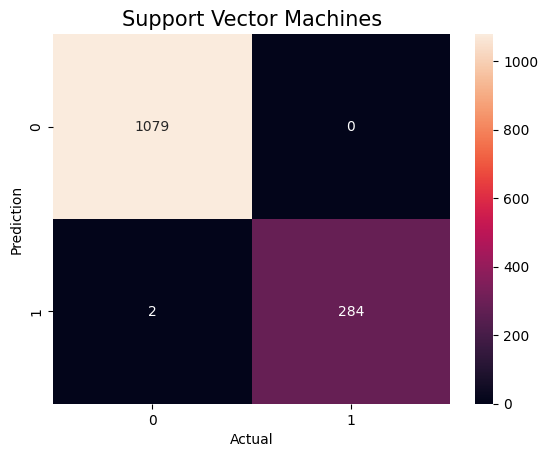

In [59]:
# =====================
# SVM
# =====================
method = 'Support Vector Machines'
ML.append(method)

clf = SVC(kernel='rbf', gamma=0.0001, C=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
CM(method, cm)
SVM_accuracy = accuracy_score(y_test, y_pred)

In [60]:
Accuracy = [LR_accuracy,DT_accuracy,KNN_accuracy,SVM_accuracy]
table = {'Method':ML, 'Accuracy %':Accuracy}
ML_df = pd.DataFrame(table)
ML_df['Accuracy %'] = (ML_df['Accuracy %']*100).round(4)
ML_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Method,Accuracy %
0,Logistic Regression,99.9267
1,Decision Tree,97.4359
2,K Nearest Neighbors,90.5495
3,Support Vector Machines,99.8535
